# Sitzung 6

Diese Skripte sind ausschließlich als Zusatz-Material gedacht. Speziell für diejenigen unter Euch, die einen Einblick in das Programmieren gewinnen wollen. Wenn Du es also leid bist repetitive Tätigkeiten auszuführen und das lieber einer Maschine überlassen willst, bist Du hier genau richtig. 

<span style="color:red"> Die Codes sind nicht für die Klausur relevant, genau genommen haben sie mit dem Lehrstuhl für Statistik __rein gar nichts__ zu tun. </span>

---

In [28]:
import numpy as np
from scipy.special import binom
from matplotlib import pyplot as plt
from tqdm import trange

## Verteilungen diskreter Wartezeiten

Ist es möglich, die Argumentationsweise der Exponentialverteilung auf die Binomialverteilung und die Hypergeometrische Verteilung zu erweitern?

Sei $$T: \text{Wartezeit auf den ersten Erfolg}$$

Wobei $$X: \text{Anzahl der Erfolge}$$

Zur Erinnerung: warten heißt, dass bisher nichts passiert ist $X=0$. 

Für $X \sim Pois(\lambda)$ gilt:

\begin{equation}
P(X=0) = \frac{\lambda^0}{0!}\exp(-\lambda) = \exp(-\lambda)
\end{equation}

Für unabhängige und identisch verteilte Zeiteinheiten gilt:

\begin{align}
P(X&=0 \text{ in 2 Zeiteinheiten}) \\
&= P(\{X=0\text{ in der ersten Zeiteinheit}\} , \{ X=0\text{ in der zweiten Zeiteinheit} \}) \\ 
&= P(\{X=0\text{ in der ersten Zeiteinheit}\}) \cdot P(\{ X=0\text{ in der zweiten Zeiteinheit} \}) \\ 
&= \exp(-\lambda) \cdot \exp(-\lambda) = \exp(-2\lambda)
\end{align}

Und allgemein:
$$P(X=0 \text{ in t Zeiteinheiten}) = \exp(-\lambda t) = P(T \geq t)$$

Damit können wir sagen:
\begin{equation}
P(T \leq t) = 1 - \exp(-\lambda t)
\end{equation}

---

## Erweiterung auf die Binomialverteilung

Für $X \sim Bin(n, p)$, mit $n \in \mathbb{N}, p \in \mathbb{R}_{+}$ gilt die obere Argumentation immer noch:

$$P_n(X=0)=\underbrace{{N \choose 0}}_{=1} \overbrace{p^0}^{=1} (1-p)^{n-0} = (1-p)^n$$

und 

$$P(T \leq n) = 1 - P_n(X=0) = 1 - (1-p)^n$$

### Überprüfung:

Wartezeit auf die erste sechs beim Mensch-ärgere-dich-nicht

In [32]:
trials = 1000000
n = np.arange(0, 100)
theoretical = 1 - (1-1/6)**n
samples = np.ones(trials)
for i in trange(trials):
    while np.random.randint(low=1, high=7) != 6:
        samples[i] += 1
values, counts = np.unique(samples, return_counts=True)
empirical = counts/trials

100%|██████████| 1000000/1000000 [00:15<00:00, 66267.40it/s]


(0, 40)

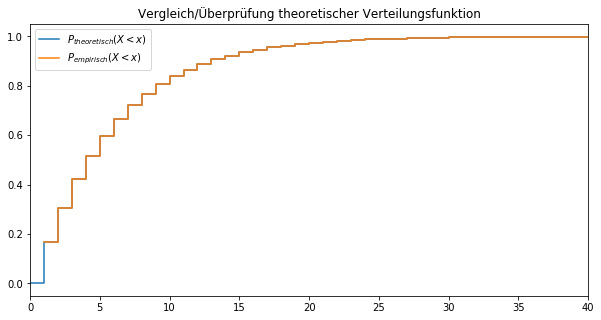

In [37]:
plt.figure(figsize=(10, 5))
plt.step(n, theoretical, where='post', label='$P_{theoretisch}(X < x)$')
plt.step(values, empirical.cumsum(), where='post', label='$P_{empirisch}(X < x)$')
plt.legend()
plt.title("Vergleich/Überprüfung theoretischer Verteilungsfunktion")
plt.xlim([0, 40])

---
## Erweiterung auf die Hypergeometrische Verteilung

Für $X \sim Hyper(N, M, n)$

\begin{align}
P_n(X=0) &= \overbrace{\left(\frac{N-M}{N}\right) \cdot \left(\frac{N-M-1}{N-1}\right) \cdot \dots \cdot \left(\frac{N-M-(n-1)}{N-(n-1)}\right)}^{\textit{n Faktoren}} \\
&= \Large{\frac{\frac{(N-M)!}{(N-M-n)!}}{\frac{N!}{(N-n)!}}}
= \Large{\frac{\frac{(N-M)! \color{red}{n!}}{(N-M-n)!\color{red}{n!}}}{\frac{N!\color{red}{n!}}{(N-n)!\color{red}{n!}}}}\\
&= \Large{\frac{\color{red}{n!}{N-M \choose n}}{\color{red}{n!}{N \choose n}} = \frac{{N-M \choose n}}{{N \choose n}}}
\end{align}

und 

$$P(T < n) = 1 - P_n(X=0) = 1 - \frac{{N-M \choose n}}{{N \choose n}}$$

### Überprüfung:

Wie wahrscheinlich ist es eine Partie russisches Roulette zu überleben?

In [51]:
N = 6
M = 1
n = np.arange(0, 6)
theoretical = 1 - binom(N-M, n)/binom(N, n)

samples = np.zeros(trials)

for i in trange(trials):
    x = [1, 2, 3, 4, 5, 6]
    np.random.shuffle(x)
    didi_mao = None
    while didi_mao != 6:
        didi_mao = x.pop()
        samples[i] += 1

values, counts = np.unique(samples, return_counts=True)
empirical = counts/trials

100%|██████████| 1000000/1000000 [00:03<00:00, 275661.38it/s]


(0, 6)

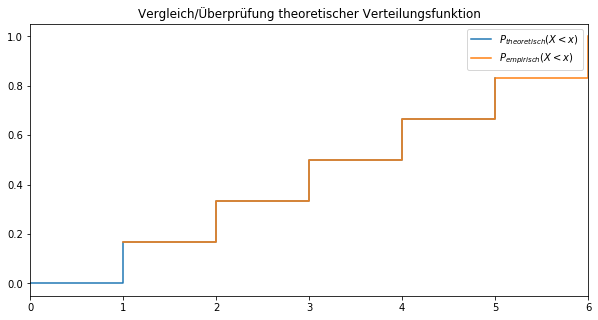

In [52]:
plt.figure(figsize=(10, 5))
plt.step(n, theoretical, where='post', label='$P_{theoretisch}(X < x)$')
plt.step(values, empirical.cumsum(), where='post', label='$P_{empirisch}(X < x)$')
plt.legend()
plt.title("Vergleich/Überprüfung theoretischer Verteilungsfunktion")
plt.xlim([0, 6])